# One-to-One and Many-to-One cases

Take Jaynes-Cummings model as an example. The master equation is given by
$$\dot{\rho}=-i[H,\rho]+\kappa\mathcal{D}[a]\rho+\gamma\mathcal{D}[\sigma]\rho,$$
where $H = \omega_c a^\dagger a + \omega_e \sigma^\dagger \sigma+g(a^\dagger\sigma+\sigma^\dagger a)$.

In [ ]:
from qcs_phy import qcs

In [1]:
import qutip as qt
import numpy as np
# %matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# system parameters
ωc = 0
ωe = 0
κ = 1
g = κ
γ = 0.1 * κ

In [3]:
# construct effective Hamiltonian
Heff = []
Heff.append([ωc-1j*κ/2, ("ad",0), ("a",0)])
Heff.append([ωe-1j*γ/2, ("sp",0), ("sm",0)])
Heff.append([g, ("ad",0), ("sm",0)])
Heff.append([g, ("a",0), ("sp",0)])

## The different input and output channels

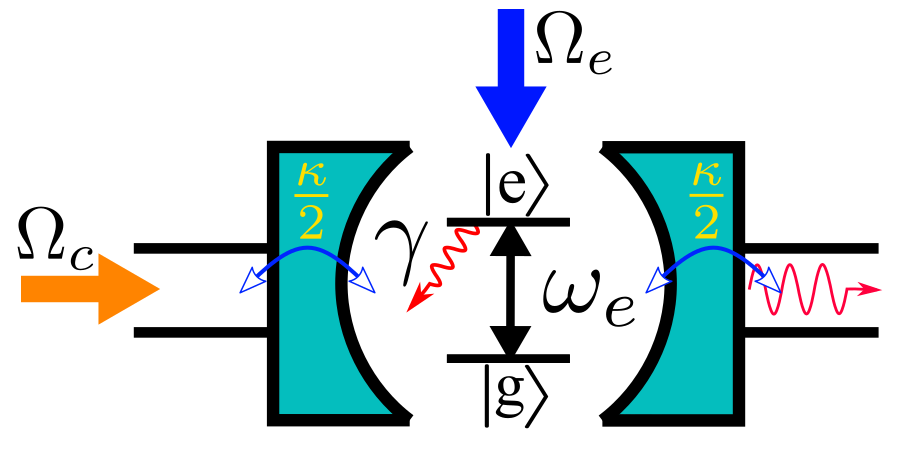

### Calculate $n$th-order equal-time correlation function and dynamical correlation function about cavity mode
$$g^{(n)}(0)=\frac{\langle a^{\dagger n}a^n\rangle_{\text{ss}}}{\langle a^{\dagger}a\rangle_{\text{ss}}^{n}},\ \  g^{(n)}(t)=\frac{\langle a^{\dagger n}(t)a^n(t)\rangle}{\langle a^{\dagger}(t)a(t)\rangle^{n}}$$

In [4]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output_c = qcs.Output_channel("c1", mode_c)

### 1.The cavity-driven case:
$$H_{d}^{(c)} = \Omega_c(a e^{it\omega_{dc}}+\text{h.c.}) $$

In [5]:
ω_dc = np.linspace(-4, 4, 4000)
Input_c = qcs.Input_channel("b1", mode_c, ω_dc)

In [6]:
result_1 = qcs(Heff, Input_c, Output_c)
g2_0_ana_c_a = result_1.calculate_quantity("c1"*2) # 2nd-order ETCF
g3_0_ana_c_a = result_1.calculate_quantity("c1"*3) # 3rd-order ETCF
g4_0_ana_c_a = result_1.calculate_quantity("c1"*4) # 4th-order ETCF

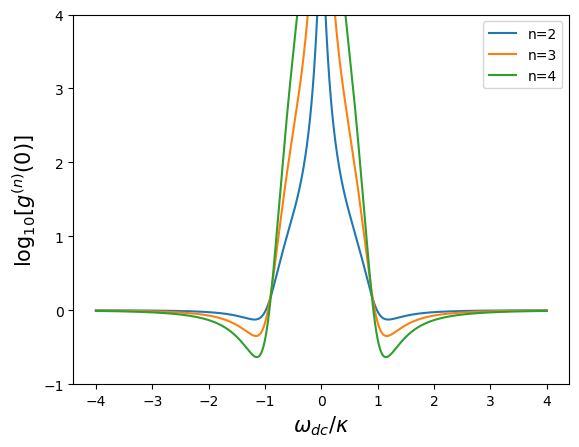

In [7]:
plt.plot(ω_dc, np.log10(g2_0_ana_c_a),label='n=2')
plt.plot(ω_dc, np.log10(g3_0_ana_c_a),label='n=3')
plt.plot(ω_dc, np.log10(g4_0_ana_c_a),label='n=4')
plt.ylim([-1, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### 2.The atom-driven case:
$$H_{d}^{(e)} = \Omega_e(\sigma e^{it\omega_{de}}+\text{h.c.}) $$

In [8]:
ω_de = np.linspace(-4, 4, 4000)
Input_e = qcs.Input_channel("b2", mode_e, ω_de)

In [9]:
result_2 = qcs(Heff, Input_e, Output_c)
g2_0_ana_e_a = result_2.calculate_quantity("c1"*2) # 2nd-order ETCF
g3_0_ana_e_a = result_2.calculate_quantity("c1"*3) # 3rd-order ETCF
g4_0_ana_e_a = result_2.calculate_quantity("c1"*4) # 4th-order ETCF

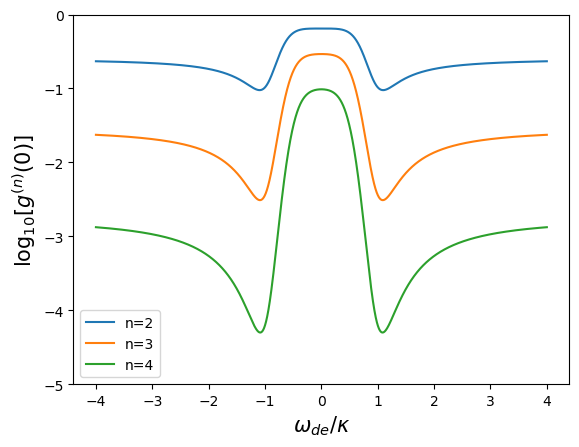

In [10]:
plt.plot(ω_de, np.log10(g2_0_ana_e_a),label='n=2')
plt.plot(ω_de, np.log10(g3_0_ana_e_a),label='n=3')
plt.plot(ω_de, np.log10(g4_0_ana_e_a),label='n=4')
plt.ylim([-5, 0])
plt.xlabel("$\omega_{de}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### 3.The cavity-atom-driven case:
$$H_{d}^{(ce)} = H_{d}^{(c)}+H_{d}^{(e)} $$
Assuming $\Omega_c=\eta\Omega_e$.

####  The identical driving frequencies: $\omega_{dc}=\omega_{de}=\omega_d$

In [11]:
η=1
ω_d = np.linspace(-4,4,4000)
Input_c = qcs.Input_channel("b1", mode_c, ω_d)
Input_e = qcs.Input_channel("b2", mode_e, ω_d)
Input = [Input_c, Input_e]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [12]:
result_3 = qcs(Heff, Input, Output_c, ratio)
g2_0_ana_ce_a = result_3.calculate_quantity("c1"*2) # 2nd-order ETCF
g3_0_ana_ce_a = result_3.calculate_quantity("c1"*3) # 3rd-order ETCF
g4_0_ana_ce_a = result_3.calculate_quantity("c1"*4) # 4th-order ETCF

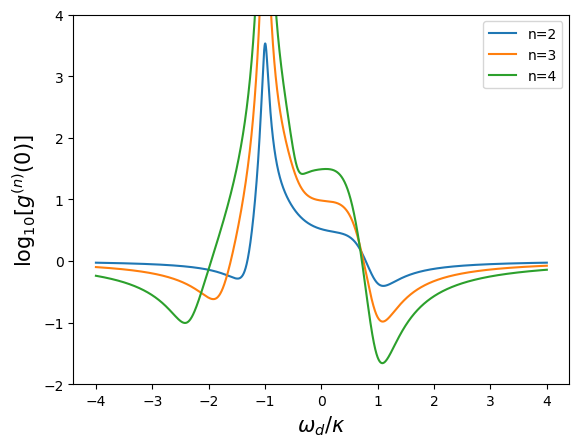

In [13]:
plt.plot(ω_d, np.log10(g2_0_ana_ce_a),label='n=2')
plt.plot(ω_d, np.log10(g3_0_ana_ce_a),label='n=3')
plt.plot(ω_d, np.log10(g4_0_ana_ce_a),label='n=4')
plt.ylim([-2, 4])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

####  The different driving frequencies: $\omega_{dc}\neq\omega_{de}\Longrightarrow \omega_{dc}=\omega_d-\omega_0,\omega_{de}=\omega_d+\omega_0$

In [14]:
η=1
ω_d = 0
ω_0 = np.pi / 2
Input_c = qcs.Input_channel("b1", mode_c, ω_d-ω_0)
Input_e = qcs.Input_channel("b2", mode_e, ω_d+ω_0)
Input = [Input_c, Input_e]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [15]:
tlist = np.linspace(0, 6, 1000)
result_4 = qcs(Heff, Input, Output_c, ratio)
g2_t_ana_ce_a = result_4.calculate_quantity("c1"*2, tlist) # 2nd-order ETCF
g3_t_ana_ce_a = result_4.calculate_quantity("c1"*3, tlist) # 3rd-order ETCF
g4_t_ana_ce_a = result_4.calculate_quantity("c1"*4, tlist) # 4th-order ETCF

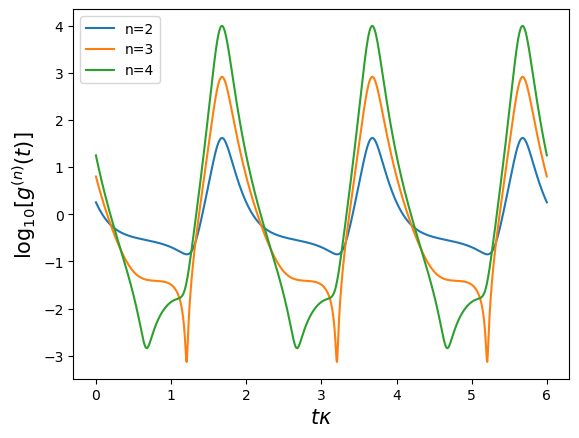

In [16]:
plt.plot(tlist, np.log10(g2_t_ana_ce_a),label='n=2')
plt.plot(tlist, np.log10(g3_t_ana_ce_a),label='n=3')
plt.plot(tlist, np.log10(g4_t_ana_ce_a),label='n=4')
plt.xlabel("$t\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(t)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

## The identical input and output channels

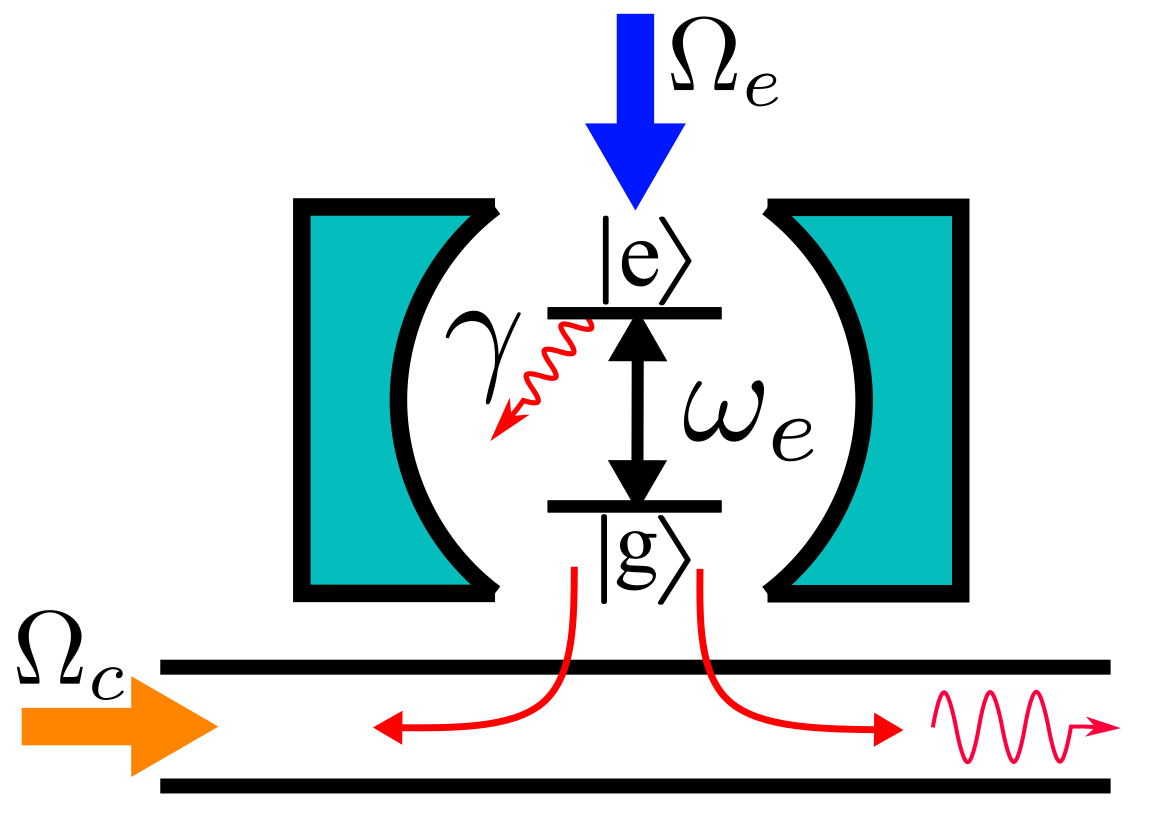

### Calculate $n$th-order equal-time correlation function and dynamical correlation function about output mode
$$g^{(n)}(0)=\frac{\langle\psi_{\text{out}}| c^{\dagger n}(t)c^n(t)|\psi_{\text{out}}\rangle}{\langle \psi_{\text{out}}|c^{\dagger}(t)c(t)|\psi_{\text{out}}\rangle^{n}},\ \  g^{(n)}(t)=\frac{\langle\psi_{\text{out}}| c^{\dagger n}(t)c^n(t)|\psi_{\text{out}}\rangle}{\langle \psi_{\text{out}}|c^{\dagger}(t)c(t)|\psi_{\text{out}}\rangle^{n}}$$

In [17]:
mode_c = [np.sqrt(κ/2), ("a", 0)]
mode_e = [np.sqrt(γ/2), ("sm", 0)]

Output = qcs.Output_channel("c", mode_c)

### 1.The single input case:
$$|\psi_{\text{in}}\rangle=|\beta\rangle_{\omega_d}^{c}\otimes|0\rangle_{\text{B}}\otimes|g\rangle,$$ 
where $\omega_d$ represents driving frequency, $\beta$ represents the coherent amplitude, and $c$ represents the input channel.

In [18]:
ω_d = np.linspace(-4, 4, 4000)
Input_1 = qcs.Input_channel("c", mode_c, ω_d)

In [19]:
result_5 = qcs(Heff, Input_1, Output)
g2_0_ana_c_c = result_5.calculate_quantity("c"*2) # 2nd-order ETCF
g3_0_ana_c_c = result_5.calculate_quantity("c"*3) # 3rd-order ETCF
g4_0_ana_c_c = result_5.calculate_quantity("c"*4) # 4th-order ETCF

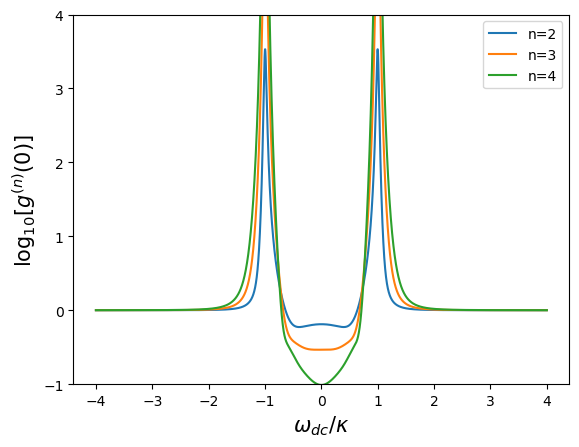

In [20]:
plt.plot(ω_d, np.log10(g2_0_ana_c_c),label='n=2')
plt.plot(ω_d, np.log10(g3_0_ana_c_c),label='n=3')
plt.plot(ω_d, np.log10(g4_0_ana_c_c),label='n=4')
plt.ylim([-1, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### 2.The double input case:
$$|\psi_{\text{in}}\rangle=|\beta_1\rangle_{\omega_{d1}}^{c}\otimes|\beta_2\rangle_{\omega_{d2}}^{b}\otimes|0\rangle_{\text{B}}\otimes|g\rangle$$ 
Assuming $\frac{\beta_1}{\beta_2}=\eta\sqrt{\frac{\kappa}{\gamma}}$.

####  The identical driving frequencies: $\omega_{d1}=\omega_{d2}=\omega_d$

In [21]:
η=1
ω_d = np.linspace(-4,4,4000)
Input_1 = qcs.Input_channel("c", mode_c, ω_d)
Input_2 = qcs.Input_channel("b", mode_e, ω_d)
Input = [Input_1, Input_2]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [22]:
result_6 = qcs(Heff, Input, Output, ratio)
g2_0_ana_ce_c = result_6.calculate_quantity("c"*2) # 2nd-order ETCF
g3_0_ana_ce_c = result_6.calculate_quantity("c"*3) # 3rd-order ETCF
g4_0_ana_ce_c = result_6.calculate_quantity("c"*4) # 4th-order ETCF

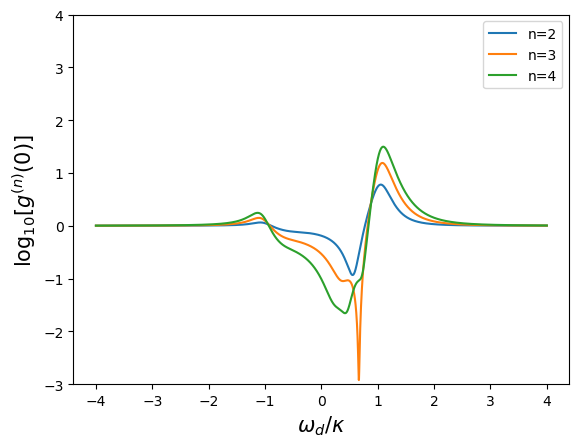

In [23]:
plt.plot(ω_d, np.log10(g2_0_ana_ce_c),label='n=2')
plt.plot(ω_d, np.log10(g3_0_ana_ce_c),label='n=3')
plt.plot(ω_d, np.log10(g4_0_ana_ce_c),label='n=4')
plt.ylim([-3, 4])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

####  The different driving frequencies: $\omega_{d1}\neq\omega_{d2}\Longrightarrow \omega_{d1}=\omega_d-\omega_0,\omega_{d2}=\omega_d+\omega_0$

In [24]:
η=1
ω_d = 0
ω_0 = np.pi / 2
Input_1 = qcs.Input_channel("c", mode_c, ω_d-ω_0)
Input_2 = qcs.Input_channel("b", mode_e, ω_d+ω_0)
Input = [Input_1, Input_2]
ratio = [1, η*np.sqrt((κ/2)/(γ/2))]

In [25]:
tlist = np.linspace(0, 6, 1000)
result_7 = qcs(Heff, Input, Output, ratio)
g2_t_ana_ce_c = result_7.calculate_quantity("c"*2, tlist) # 2nd-order ETCF
g3_t_ana_ce_c = result_7.calculate_quantity("c"*3, tlist) # 3rd-order ETCF
g4_t_ana_ce_c = result_7.calculate_quantity("c"*4, tlist) # 4th-order ETCF

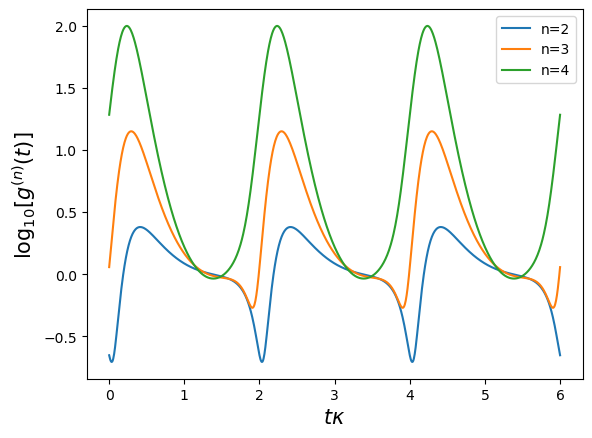

In [26]:
plt.plot(tlist, np.log10(g2_t_ana_ce_c),label='n=2')
plt.plot(tlist, np.log10(g3_t_ana_ce_c),label='n=3')
plt.plot(tlist, np.log10(g4_t_ana_ce_c),label='n=4')
plt.xlabel("$t\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(t)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

# Numerical comparison by QuTip

In [27]:
N = 5 # cavity dimension

a = qt.tensor(qt.destroy(N), qt.qeye(2))
σ = qt.tensor(qt.qeye(N), qt.sigmam())

c_ops = [np.sqrt(κ) * a, np.sqrt(γ) * σ]

># The different input and output channels

## The cavity-driven and atom-driven cases

In [28]:
g2_0_num_c_a = []
g3_0_num_c_a = []
g4_0_num_c_a = []
g2_0_num_e_a = []
g3_0_num_e_a = []
g4_0_num_e_a = []

In [29]:
Ωc = 5e-3
Ωe = 5e-3

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dc = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
    H_de = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωe * (σ + σ.dag())
    rho1_ss = qt.steadystate(H_dc, c_ops)
    rho2_ss = qt.steadystate(H_de, c_ops)
    g2_0_num_c_a.append(qt.expect(a.dag()**2*a**2,rho1_ss)/(qt.expect(a.dag()*a,rho1_ss)**2))
    g3_0_num_c_a.append(qt.expect(a.dag()**3*a**3,rho1_ss)/(qt.expect(a.dag()*a,rho1_ss)**3))
    g4_0_num_c_a.append(qt.expect(a.dag()**4*a**4,rho1_ss)/(qt.expect(a.dag()*a,rho1_ss)**4))
    g2_0_num_e_a.append(qt.expect(a.dag()**2*a**2,rho2_ss)/(qt.expect(a.dag()*a,rho2_ss)**2))
    g3_0_num_e_a.append(qt.expect(a.dag()**3*a**3,rho2_ss)/(qt.expect(a.dag()*a,rho2_ss)**3))
    g4_0_num_e_a.append(qt.expect(a.dag()**4*a**4,rho2_ss)/(qt.expect(a.dag()*a,rho2_ss)**4))

### The cavity-driven comparison

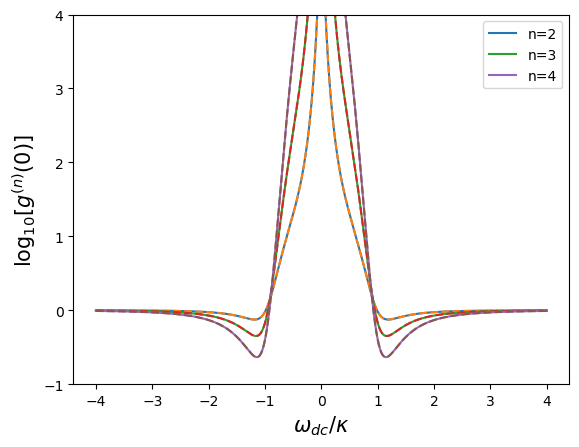

In [30]:
plt.plot(ωd_list, np.log10(g2_0_num_c_a),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_c_a), '--')
plt.plot(ωd_list, np.log10(g3_0_num_c_a),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_c_a), '--')
plt.plot(ωd_list, np.log10(g4_0_num_c_a),label='n=4')
plt.plot(ωd_list, np.log10(g4_0_ana_c_a), '--')
plt.ylim([-1, 4])
plt.xlabel("$\omega_{dc}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### The atom-driven comparison

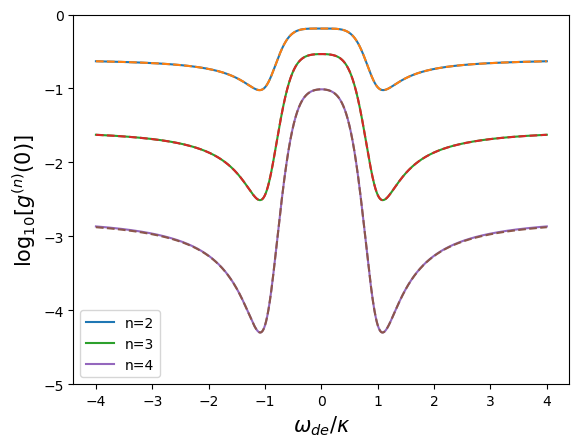

In [32]:
plt.plot(ωd_list, np.log10(g2_0_num_e_a),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_e_a), '--')
plt.plot(ωd_list, np.log10(g3_0_num_e_a),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_e_a), '--')
plt.plot(ωd_list, np.log10(g4_0_num_e_a),label='n=4')
plt.plot(ωd_list, np.log10(g4_0_ana_e_a), '--')
plt.ylim([-5, 0])
plt.xlabel("$\omega_{de}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

## The cavity-atom-driven case

In [33]:
g2_0_num_ce_a = []
g3_0_num_ce_a = []
g4_0_num_ce_a = []

### The identical driving frequencies

In [34]:
Ωc = 5e-3
Ωe = 5e-3

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dce = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())+ Ωe * (σ + σ.dag())
    rho_ss = qt.steadystate(H_dce, c_ops)
    g2_0_num_ce_a.append(qt.expect(a.dag()**2*a**2,rho_ss)/(qt.expect(a.dag()*a,rho_ss)**2))
    g3_0_num_ce_a.append(qt.expect(a.dag()**3*a**3,rho_ss)/(qt.expect(a.dag()*a,rho_ss)**3))
    g4_0_num_ce_a.append(qt.expect(a.dag()**4*a**4,rho_ss)/(qt.expect(a.dag()*a,rho_ss)**4))

#### The cavity-atom-driven comparison

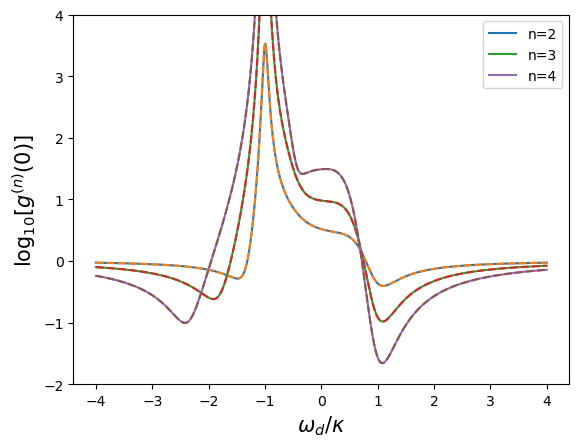

In [35]:
plt.plot(ωd_list, np.log10(g2_0_num_ce_a),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_ce_a), '--')
plt.plot(ωd_list, np.log10(g3_0_num_ce_a),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_ce_a), '--')
plt.plot(ωd_list, np.log10(g4_0_num_ce_a),label='n=4')
plt.plot(ωd_list, np.log10(g4_0_ana_ce_a), '--')
plt.ylim([-2, 4])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### The different driving frequencies

In [36]:
options = qt.Options(atol=1e-15, rtol=1e-15, order=30)

def H_coff(t, args):
    return np.exp(1j * args['δω'] * t)
def Hd_coff(t, args):
    return np.exp(-1j * args['δω'] * t)

Ωc = 1e-2
Ωe = 1e-2

ω_d = 0
ω_0 = np.pi / 2
ω_dc = ω_d-ω_0
ω_de = ω_d+ω_0

H0 = (ωc-ω_dc) * a.dag() * a + (ωe-ω_dc) * σ.dag() * σ + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
H = [H0, [σ * Ωe, H_coff], [σ.dag() * Ωe, Hd_coff]]
args = {'δω':ω_de-ω_dc}

tlist_1 = np.linspace(0, 100, 20000)
psi0 = qt.tensor(qt.fock(N,0), qt.basis(2,1))
output = qt.mesolve(H, psi0, tlist_1, c_ops, [], args, options=options)

rho_t = output.states
n = qt.expect(a.dag() * a, rho_t)
G2 = qt.expect(a.dag() ** 2 * a ** 2, rho_t)
G3 = qt.expect(a.dag() ** 3 * a ** 3, rho_t)
G4 = qt.expect(a.dag() ** 4 * a ** 4, rho_t)

g2_t_num_ce_a = G2[-1200:] / n[-1200:] ** 2
g3_t_num_ce_a = G3[-1200:] / n[-1200:] ** 3
g4_t_num_ce_a = G4[-1200:] / n[-1200:] ** 4

tlist_1 = tlist_1[-1200:] - tlist_1[-1200]

#### The cavity-atom-driven comparison

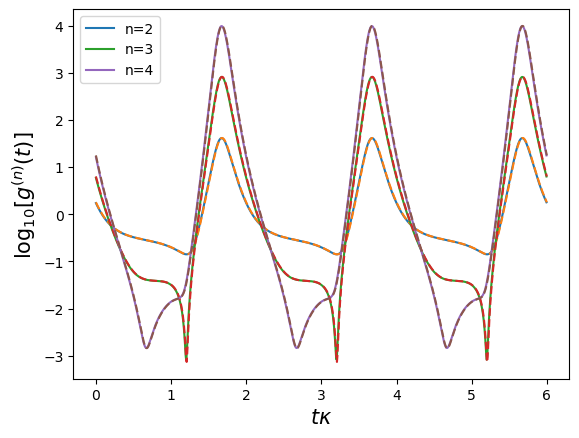

In [37]:
plt.plot(tlist_1, np.log10(g2_t_num_ce_a),label='n=2')
plt.plot(tlist, np.log10(g2_t_ana_ce_a), '--')
plt.plot(tlist_1, np.log10(g3_t_num_ce_a),label='n=3')
plt.plot(tlist, np.log10(g3_t_ana_ce_a), '--')
plt.plot(tlist_1, np.log10(g4_t_num_ce_a),label='n=4')
plt.plot(tlist, np.log10(g4_t_ana_ce_a), '--')
plt.xlabel("$t\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(t)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

># The identical input and output channels

## The single input case

In [38]:
g2_0_num_c_c = []
g3_0_num_c_c = []
g4_0_num_c_c = []

In [39]:
Ωc = 5e-2

c = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dc = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
    rho1_ss = qt.steadystate(H_dc, c_ops)
    g2_0_num_c_c.append(qt.expect(c.dag()**2*c**2,rho1_ss)/(qt.expect(c.dag()*c,rho1_ss)**2))
    g3_0_num_c_c.append(qt.expect(c.dag()**3*c**3,rho1_ss)/(qt.expect(c.dag()*c,rho1_ss)**3))
    g4_0_num_c_c.append(qt.expect(c.dag()**4*c**4,rho1_ss)/(qt.expect(c.dag()*c,rho1_ss)**4))

### The single input comparison

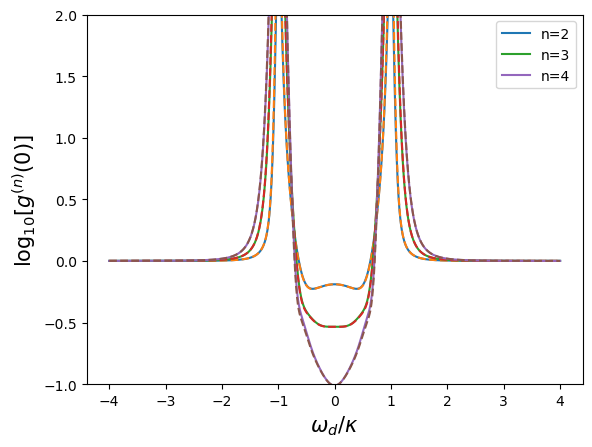

In [40]:
plt.plot(ωd_list, np.log10(g2_0_num_c_c),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_c_c), '--')
plt.plot(ωd_list, np.log10(g3_0_num_c_c),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_c_c), '--')
plt.plot(ωd_list, np.log10(g4_0_num_c_c),label='n=4')
plt.plot(ωd_list, np.log10(g4_0_ana_c_c), '--')
plt.ylim([-1, 2])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

## The double input case

In [41]:
g2_0_num_ce_c = []
g3_0_num_ce_c = []
g4_0_num_ce_c = []

### The identical driving frequencies

In [42]:
Ωc = 1e-2
Ωe = 1e-2

c = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)

ωd_list = np.linspace(-4, 4, 4000)
for kk,ωd in enumerate(ωd_list):
    H_dce = (ωc-ωd) * (a.dag() * a) + (ωe-ωd) * (σ.dag() * σ) + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())+ Ωe * (σ + σ.dag())
    rho_ss = qt.steadystate(H_dce, c_ops)
    g2_0_num_ce_c.append(qt.expect(c.dag()**2*c**2,rho_ss)/(qt.expect(c.dag()*c,rho_ss)**2))
    g3_0_num_ce_c.append(qt.expect(c.dag()**3*c**3,rho_ss)/(qt.expect(c.dag()*c,rho_ss)**3))
    g4_0_num_ce_c.append(qt.expect(c.dag()**4*c**4,rho_ss)/(qt.expect(c.dag()*c,rho_ss)**4))

#### The cavity-atom-driven comparison

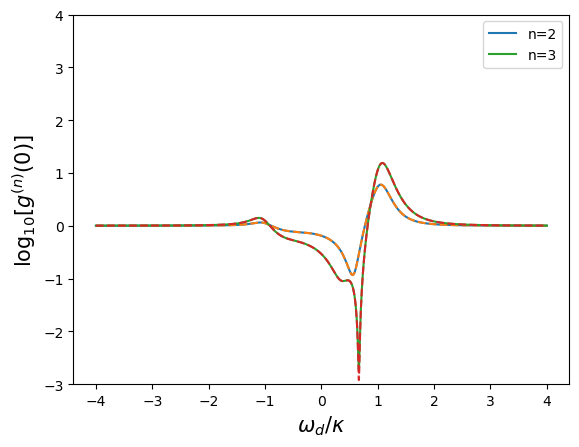

In [43]:
plt.plot(ωd_list, np.log10(g2_0_num_ce_c),label='n=2')
plt.plot(ωd_list, np.log10(g2_0_ana_ce_c), '--')
plt.plot(ωd_list, np.log10(g3_0_num_ce_c),label='n=3')
plt.plot(ωd_list, np.log10(g3_0_ana_ce_c), '--')
# plt.plot(ωd_list, np.log10(g4_0_num_ce_c),label='n=4')
# plt.plot(ωd_list, np.log10(g4_0_ana_ce_c), '--')
plt.ylim([-3, 4])
plt.xlabel("$\omega_{d}/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(0)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

### The different driving frequencies

In [44]:
options = qt.Options(atol=1e-15, rtol=1e-15, order=30)

def H_coff(t, args):
    return np.exp(1j * args['δω'] * t)
def Hd_coff(t, args):
    return np.exp(-1j * args['δω'] * t)

Ωc = 1e-2
Ωe = 1e-2

ω_d = 0
ω_0 = np.pi / 2
ω_dc = ω_d-ω_0
ω_de = ω_d+ω_0

H0 = (ωc-ω_dc) * a.dag() * a + (ωe-ω_dc) * σ.dag() * σ + g * (a.dag() * σ + σ.dag() * a) + Ωc * (a + a.dag())
H = [H0, [σ * Ωe, H_coff], [σ.dag() * Ωe, Hd_coff]]
args = {'δω':ω_de-ω_dc}

tlist_1 = np.linspace(0, 100, 20000)
psi0 = qt.tensor(qt.fock(N,0), qt.basis(2,1))
output = qt.mesolve(H, psi0, tlist_1, c_ops, [], args, options=options)

c = np.sqrt(κ/2)*(Ωc/(κ/2)-1j*a)

rho_t = output.states
n = qt.expect(c.dag() * c, rho_t)
G2 = qt.expect(c.dag() ** 2 * c ** 2, rho_t)
G3 = qt.expect(c.dag() ** 3 * c ** 3, rho_t)
G4 = qt.expect(c.dag() ** 4 * c ** 4, rho_t)

g2_t_num_ce_c = G2[-1200:] / n[-1200:] ** 2
g3_t_num_ce_c = G3[-1200:] / n[-1200:] ** 3
g4_t_num_ce_c = G4[-1200:] / n[-1200:] ** 4

tlist_1 = tlist_1[-1200:] - tlist_1[-1200]

#### The cavity-atom-driven comparison

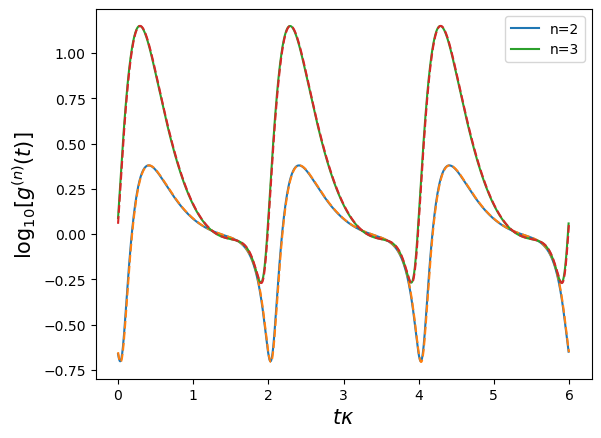

In [45]:
plt.plot(tlist_1, np.log10(g2_t_num_ce_c),label='n=2')
plt.plot(tlist, np.log10(g2_t_ana_ce_c), '--')
plt.plot(tlist_1, np.log10(g3_t_num_ce_c),label='n=3')
plt.plot(tlist, np.log10(g3_t_ana_ce_c), '--')
# plt.plot(tlist_1, np.log10(g4_t_num_ce_c),label='n=4')
# plt.plot(tlist, np.log10(g4_t_ana_ce_c), '--')
plt.xlabel("$t\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"$\log_{10}[g^{(n)}(t)]$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

Note that we don't display the $n=4$ case here because the precision is not enough in QuTip.